In [66]:
import nfinder
import numpy as np
import matplotlib.pyplot as plt

# Synthetic dataset

In [64]:
seed = np.random.seed(0)
points = np.random.normal(loc=10, scale=2, size=(11, 2))#np.array([[0, 1], [2, 3], [2, 2], [1, 1], [1,0]])

df_edges, thresholds = nfinder.edgeprops(points)
edges = nfinder.neighbors_graph(points)

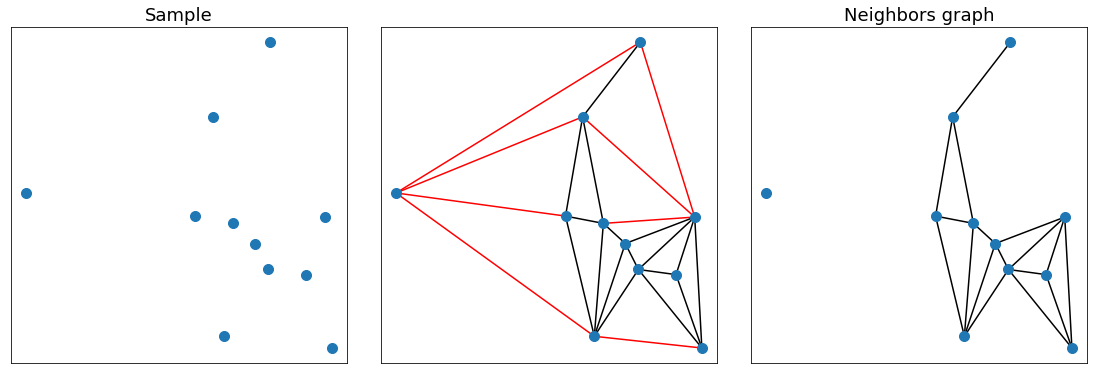

In [65]:
titlesize = 18
dot_size, dot_color = 10, 'tab:blue'

fig, axes = plt.subplots(1, 3, figsize=(3*5, 5), sharex=True, sharey=True)

axes[0].set_title('Sample', size=titlesize)
for source, target, isNeighbor in np.array(df_edges[['source', 'target', 'isNeighbor']]):
  if isNeighbor:
    color='black'
  else:
    color='red'
  axes[1].plot([points[source][0], points[target][0]], [points[source][1], points[target][1]], ls='-', 
               color=color)

axes[2].set_title('Neighbors graph', size=titlesize)
for source, target in edges:
  axes[2].plot([source[0], target[0]], [source[1], target[1]], ls='-', color='black')

for ax in axes:
  ax.plot(points[:, 0], points[:, 1], 'o', markersize=dot_size, color=dot_color)
  ax.set(xticks=[], yticks=[])

plt.tight_layout(pad=0)
fig.subplots_adjust(wspace=0.1)
plt.show()

# Real dataset